<a href="https://colab.research.google.com/github/ericksanchezcorrea/Data_Science/blob/main/An%C3%A1lisis_Premios_Nobel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
nobel = pd.read_csv('/content/nobel.csv')
nobel.head(3)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany


# ¿Qué Países tiene más premios?

In [15]:
nobel['birth_country'].value_counts().head(3)

birth_country
United States of America    259
United Kingdom               85
Germany                      61
Name: count, dtype: int64

#¿Cuántos premios tenemos registrados?

In [10]:
len(nobel)

911

#¿Cuántos premios han ganado hombres y mujeres?

In [29]:
nobel['sex'].value_counts()

sex
Male      836
Female     49
Name: count, dtype: int64

# ¿Qué categoría tiene más premios?

In [26]:
nobel['category'].value_counts()

category
Medicine      211
Physics       204
Chemistry     175
Peace         130
Literature    113
Economics      78
Name: count, dtype: int64

#Gráfica de la evolución de USA por décadas

In [110]:
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'

In [111]:
nobel['decade'] = (np.floor(nobel['year']/10)*10).astype(int)

In [138]:
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()

In [139]:
prop_usa_winners

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


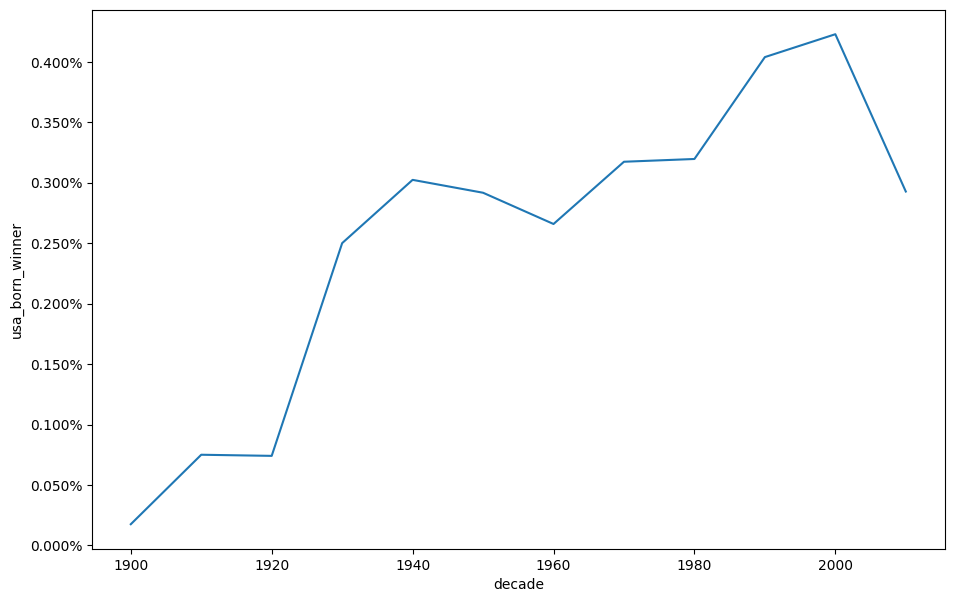

In [147]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [11,7]
ax = sns.lineplot(
    x='decade',
    y='usa_born_winner',
    data = prop_usa_winners
)

from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter())

#Cuál % de victoria entre hombres y mujeres en las distintas categorías

In [175]:
nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()
#prop_female_winners['female_winner'] = prop_female_winners['female_winner']*100
#prop_female_winners['female_winner'] = prop_female_winners['female_winner'].apply(lambda x: f'{x:.2f}%')
prop_female_winners

,decade,category,female_winner
0,1900,Chemistry,0.000000
1,1900,Literature,0.100000
2,1900,Medicine,0.000000
3,1900,Peace,0.071429
4,1900,Physics,0.076923
...,...,...,...
61,2010,Economics,0.000000
62,2010,Literature,0.285714
63,2010,Medicine,0.125000
64,2010,Peace,0.400000


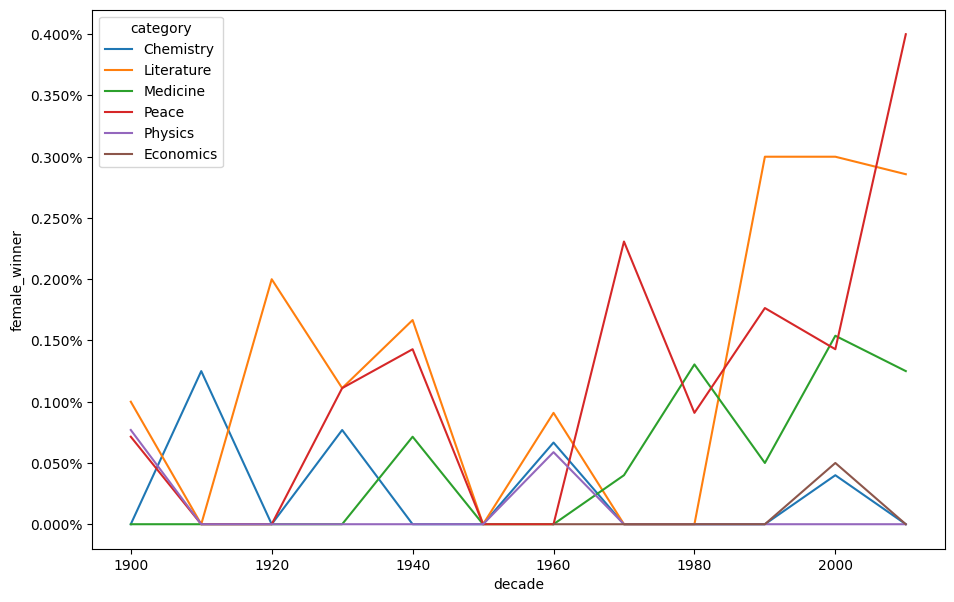

In [176]:
ax = sns.lineplot(
    x='decade',
    y='female_winner',
    data= prop_female_winners,
    hue='category'
)
ax.yaxis.set_major_formatter(PercentFormatter())

#En qué edad hay más ganadores

In [179]:
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])
nobel['age'] = nobel['year'] - nobel['birth_date'].dt.year
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_city,organization_country,death_date,death_city,death_country,usa_nobel_winner,decade,usa_born_winner,female_winner,age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,...,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900,False,False,49.0
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,...,NaN,NaN,1907-09-07,Châtenay,France,False,1900,False,False,62.0
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),...,Marburg,Germany,1917-03-31,Marburg,Germany,False,1900,False,False,47.0
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,...,NaN,NaN,1910-10-30,Heiden,Switzerland,False,1900,False,False,73.0
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,...,NaN,NaN,1912-06-12,Paris,France,False,1900,False,False,79.0


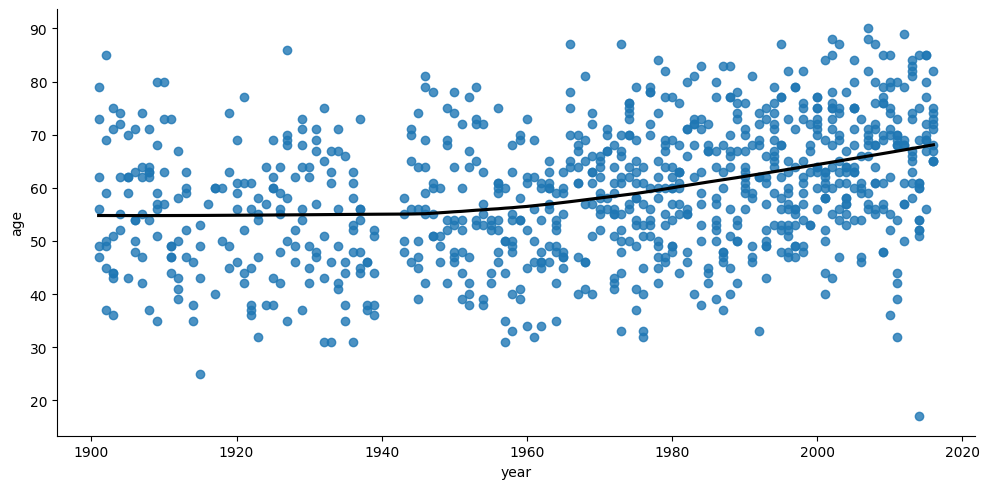

In [181]:
sns.lmplot(
    x='year',
    y='age',
    data=nobel,
    lowess=True,
    aspect=2,
    line_kws={'color':'black'}
)

# Rango de edad de los ganadores por categoría

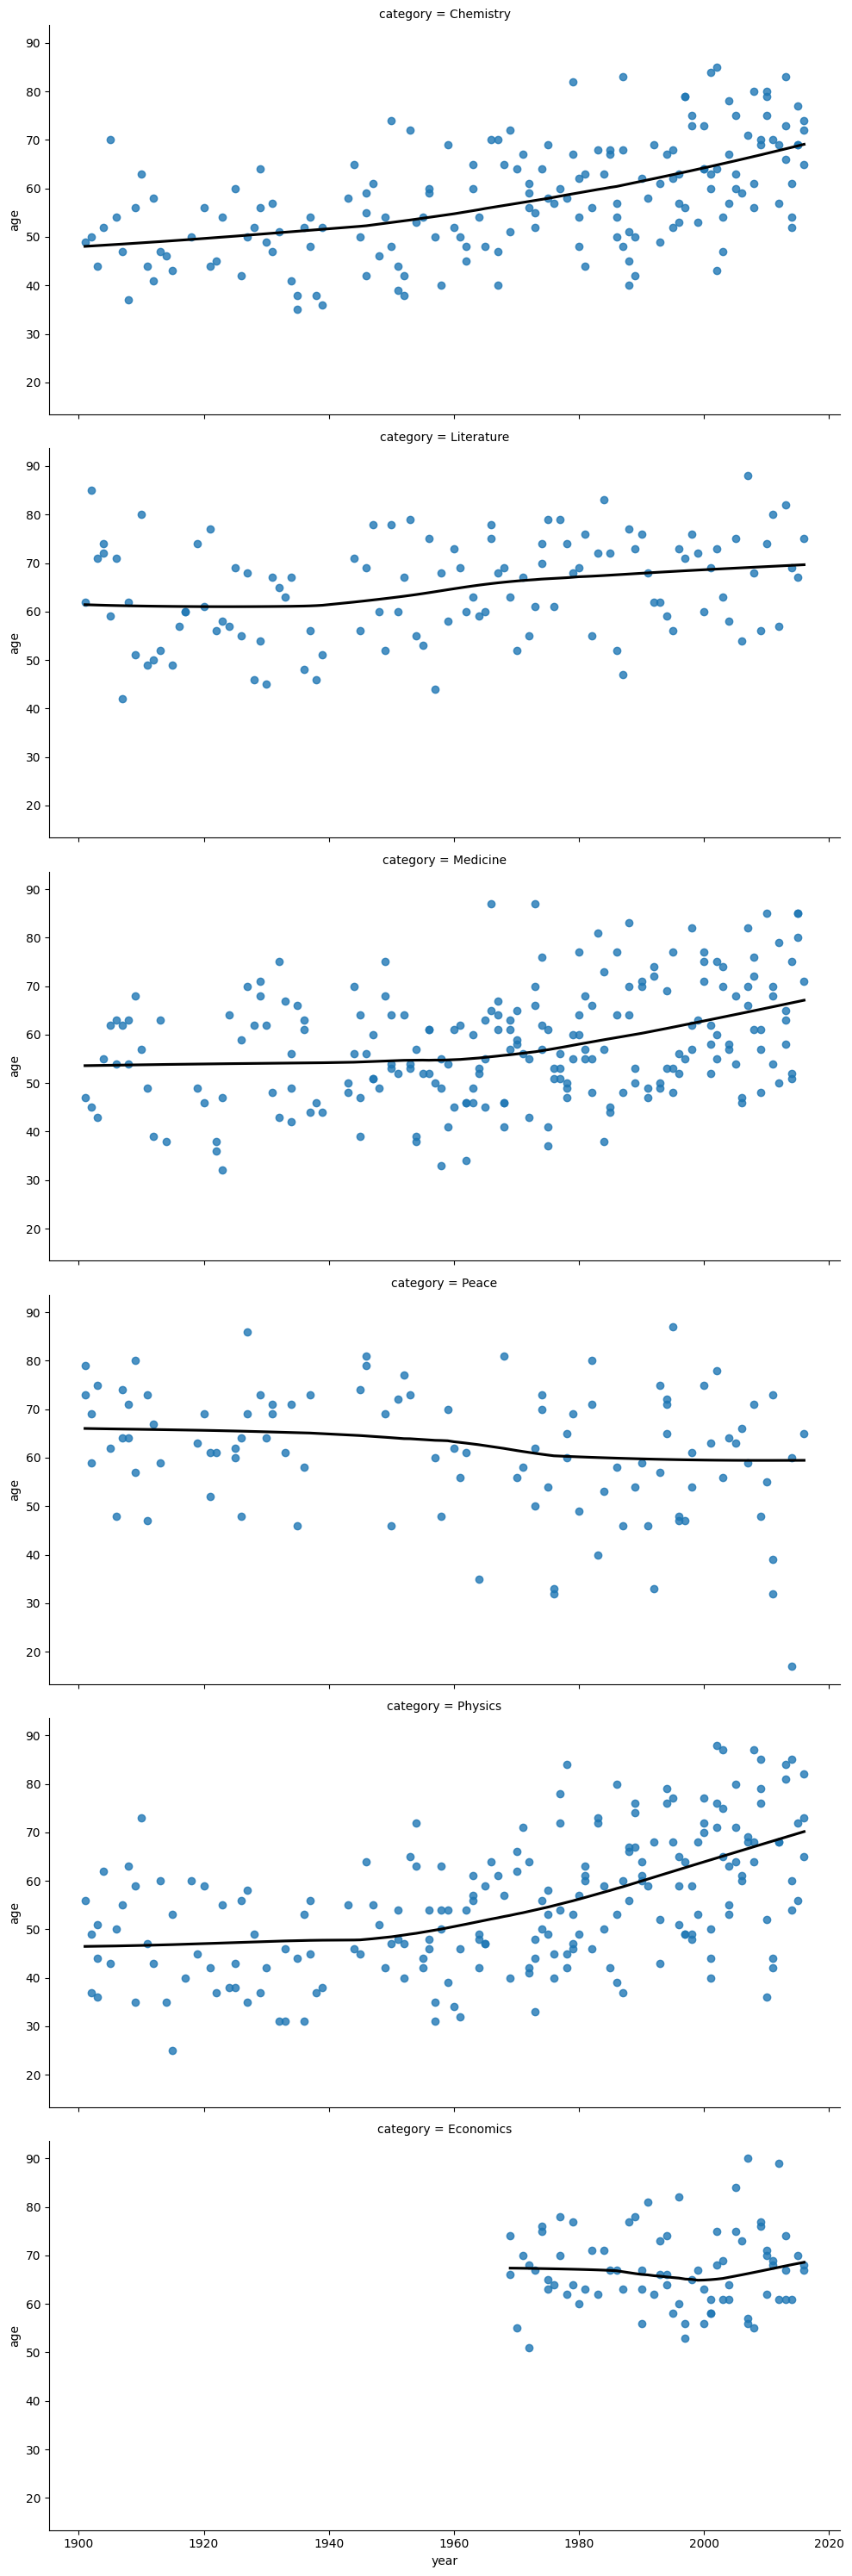

In [182]:
sns.lmplot(
    x='year',
    y='age',
    data=nobel,
    lowess=True,
    aspect=2,
    line_kws={'color':'black'},
    row='category'
)

# La persona más vieja en ganar el premio nobel y la más joven

In [191]:
nobel.nlargest(1,'age')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_city,organization_country,death_date,death_city,death_country,usa_nobel_winner,decade,usa_born_winner,female_winner,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,False,False,90.0


In [188]:
nobel.nsmallest(1,'age')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_city,organization_country,death_date,death_city,death_country,usa_nobel_winner,decade,usa_born_winner,female_winner,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,False,2010,False,True,17.0
